In [36]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [37]:
# Read the CSV file into a Pandas DataFrame
kidney_df_cleaned = pd.read_csv("merged/kidney_clean_20.csv")
kidney_df_cleaned

,Unnamed: 0,Transplant Year,Age Group,Number_of_Transplants,Graft_Survival_Rate_20,Patient_Survival_Rate_20,Blood_O,Blood_A,Blood_B,Blood_AB,...,Retransplant/Graft Failure,Tubular and Interstitial Diseases,"White, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,Unknown,"Asian, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic"
0,0,2002,<1 Year,5,0.00,0.00,2,2,0,1,...,0,2,157,31,54,0,7,3,0,3
1,1,2002,1-5 Years,137,38.11,90.08,72,54,15,0,...,2,11,256,94,102,0,19,2,2,2
2,2,2002,6-10 Years,146,25.11,72.87,77,56,15,9,...,8,14,163,47,60,1,5,2,0,1
3,3,2002,11-17 Years,385,16.58,67.76,233,161,51,20,...,74,48,447,131,127,2,21,7,6,5
4,4,2002,18-34,2100,28.68,58.70,1175,972,310,116,...,426,137,2030,814,568,1,139,14,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,116,1988,11-17 Years,271,19.41,66.35,182,163,44,18,...,3,62,356,103,62,3,11,4,0,0
117,117,1988,18-34,2076,24.23,50.51,1286,1060,322,125,...,10,235,2419,603,303,3,83,16,7,0
118,118,1988,35-49,2579,17.21,27.50,1486,1274,383,146,...,8,201,3196,838,291,5,109,43,1,0
119,119,1988,50-64,1654,10.71,10.48,876,730,232,88,...,2,112,2487,490,179,6,60,20,3,0


In [38]:
good_survival = pd.cut( kidney_df_cleaned["Patient_Survival_Rate_20"], [-1, 25, 50, 75, 100], labels=["D", "C", "B", "A"])
good_survival

0      D
1      A
2      B
3      B
4      B
      ..
116    B
117    B
118    C
119    D
120    D
Name: Patient_Survival_Rate_20, Length: 121, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [39]:
kidney_df_cleaned["Patient_Survival_status"] = good_survival
Y = kidney_df_cleaned["Patient_Survival_status"]
X = kidney_df_cleaned.drop(columns=['Unnamed: 0', 'Number_of_Transplants', 'Patient_Survival_Rate_20', 'Transplant Year', 'Patient_Survival_status'])

In [40]:
X = pd.get_dummies(X)
X

,Graft_Survival_Rate_20,Blood_O,Blood_A,Blood_B,Blood_AB,Deceased_Donor,Living_Donor,"Congenital, Rare, Familial, and Metaboli",Diabetes,Glomerular Disease,...,"Multiracial, Non-Hispanic",Age Group_1-5 Years,Age Group_11-17 Years,Age Group_18-34,Age Group_35-49,Age Group_50-64,Age Group_6-10 Years,Age Group_65+,Age Group_<1 Year,Age Group_Not Reported
0,0.00,2,2,0,1,220,35,1,0,0,...,3,0,0,0,0,0,0,0,1,0
1,38.11,72,54,15,0,351,126,52,1,18,...,2,1,0,0,0,0,0,0,0,0
2,25.11,77,56,15,9,178,101,49,0,42,...,1,0,0,0,0,0,1,0,0,0
3,16.58,233,161,51,20,486,260,104,1,134,...,5,0,1,0,0,0,0,0,0,0
4,28.68,1175,972,310,116,2200,1385,95,205,948,...,6,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,19.41,182,163,44,18,369,170,76,0,177,...,0,0,1,0,0,0,0,0,0,0
117,24.23,1286,1060,322,125,2581,853,88,593,1220,...,0,0,0,1,0,0,0,0,0,0
118,17.21,1486,1274,383,146,3982,501,32,780,1104,...,0,0,0,0,1,0,0,0,0,0
119,10.71,876,730,232,88,3055,190,2,333,561,...,0,0,0,0,0,1,0,0,0,0


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
X_train.shape

(90, 35)

In [42]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[ 1.62055069, -0.83685578, -0.85050374, ..., -0.35355339,
        -0.35355339, -0.10599979],
       [ 0.20674415, -0.84942049, -0.84887564, ..., -0.35355339,
        -0.35355339, -0.10599979],
       [ 0.7745772 , -0.86477735, -0.85864426, ..., -0.35355339,
        -0.35355339, -0.10599979],
       ...,
       [ 0.50532303, -0.6567617 , -0.64210635, ..., -0.35355339,
        -0.35355339, -0.10599979],
       [-0.2873328 , -0.82568716, -0.84073511, ..., -0.35355339,
        -0.35355339, -0.10599979],
       [ 0.832338  ,  0.73233607,  0.65386489, ..., -0.35355339,
        -0.35355339, -0.10599979]])

In [43]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, Y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
acc_score = accuracy_score(Y_test, predictions)


Accuracy Score : 0.7741935483870968


In [45]:
print(f"Accuracy Score : {acc_score}")
print(classification_report(Y_test, predictions))

Accuracy Score : 0.7741935483870968
              precision    recall  f1-score   support

           A       0.12      1.00      0.22         1
           B       1.00      0.46      0.63        13
           C       1.00      1.00      1.00         4
           D       1.00      1.00      1.00        13

    accuracy                           0.77        31
   macro avg       0.78      0.87      0.71        31
weighted avg       0.97      0.77      0.82        31



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

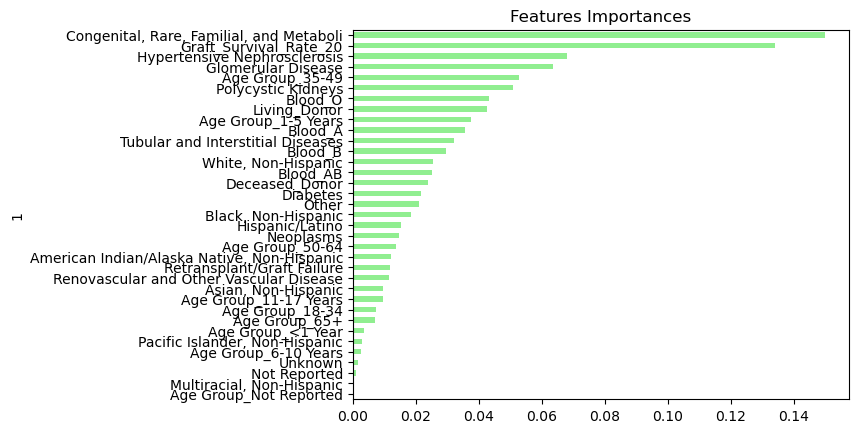

In [46]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)